Soveltava matematiikka ja fysiikka ohjelmoinnissa.

Matematiikan tehtävät 13 -15

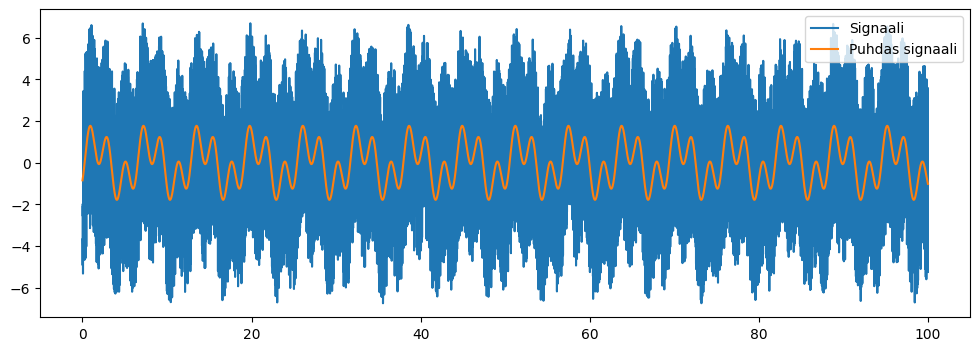

In [7]:
#13. Signaali on määritelty seuraavasti: 
import numpy as np
dt = 0.01
a = np.arange(0,100,dt)
noisy_signal = np.sin(a) + np.sin(3*a-1) + 10*np.random.rand(len(a))  #Jossa 10*np.random.rand(len(a))  on satunnaiskohinaa, kerroin 10 on amplitudin kerroin
#jossa siis varsinainen signaali on kahden siniaallon summa sin(a)+sin(3a−1) 
# ja siihen päälle lisätään satunnaiskohinaa. 
# KirjoitaPython-ohjelma, jolla poistetaan kohina signaalista Fourier-analyysiä käyttäen

#Nythän tiedetään, että puhdas signaali olisi:
clean_signal = np.sin(a) + np.sin(3*a-1)

#Tehdään signaalin ns. nollatason poisto, eli vähennetään siitä sen keskiarvo
noisy_signal = noisy_signal - np.mean(noisy_signal)
clean_signal = clean_signal - np.mean(clean_signal)

#Piirretään kuvaaja 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(a,noisy_signal)
plt.plot(a,clean_signal)
plt.legend(['Signaali','Puhdas signaali'])

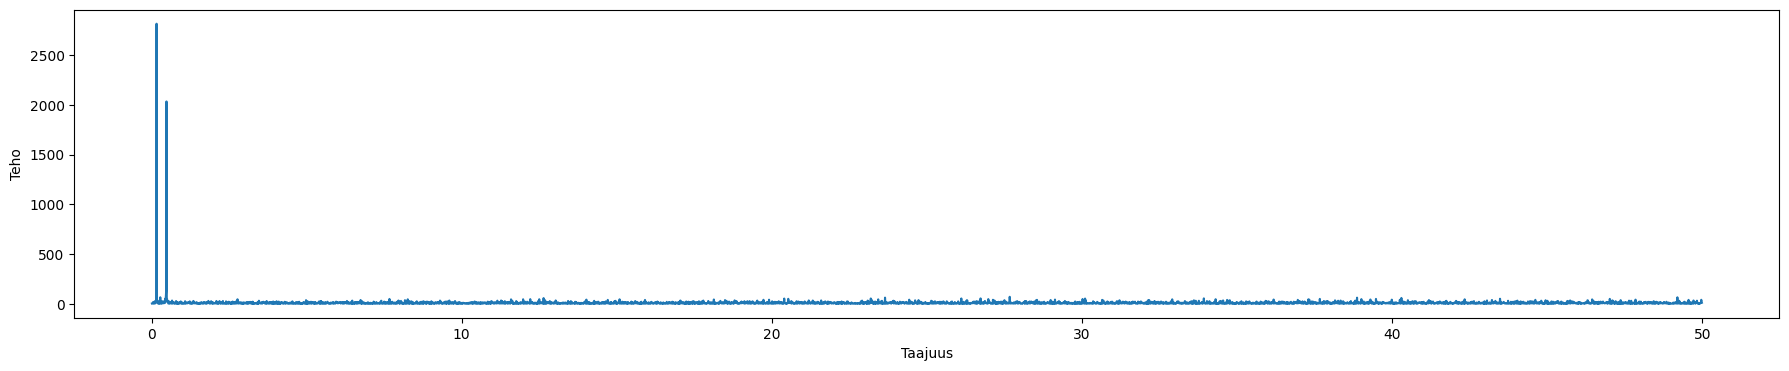

In [11]:
#Lasketaan signaalin Fourier-muunnos ja tehospektri
N = len(noisy_signal) #Pisteiden määrä
fourier = np.fft.fft(noisy_signal,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Mahdolliset taajuudet
L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.figure(figsize=(22,4))
#plt.semilogx(freq[L],psd[L].real)
plt.plot(freq[L],psd[L].real)
plt.xlabel('Taajuus')
plt.ylabel('Teho')
plt.show()
#Nähdään kaksi dominoivaa piikkiä, kaikki muu on satunnaiskohinaa
#Voidaan päätell, että piikit vastaavat puhtaan signaalin sisältämiä taajuuksia
#Huom! Tämä voitaisiin päätellä, vaikka ei tiedettäisi, millainen puhdas signaali on

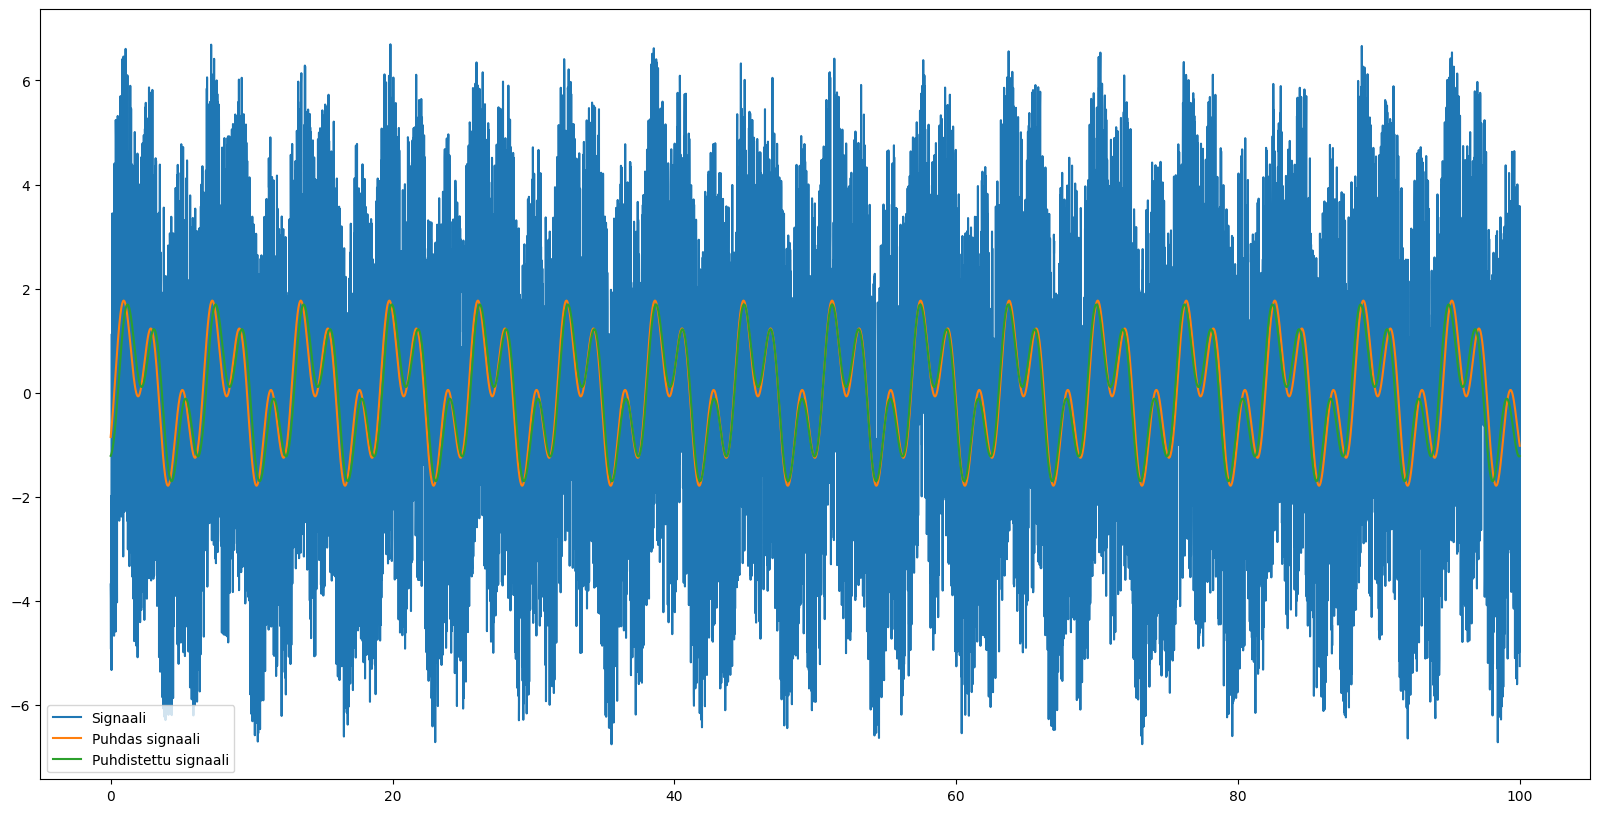

In [16]:
#Poistetaan kohina, eli rajataan pois taajuudet piikkien ulkopuolella. 
#Tässä voidaan esimerkiksi päättää, että tehon tulee olla yli 100 (voi olla jotain välillä 100 ja 2000)
fourier_clean = fourier.copy() #Kopio alkuperäisen signaalin fft:stä. Huom! Fourier-muunnos sisältää täydellisen informaation signaalista. Eli siitä voidaan palauttaa alkuperäinen signaali
fourier_clean[psd.real < 1000] = 0 #Asetaan nollaan kaikki taajuuden piikkien ulkopuolella
signal_cleaned = np.fft.ifft(fourier_clean)

#Piirretään kuvaaja 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(a,noisy_signal)
plt.plot(a,clean_signal)
plt.plot(a,signal_cleaned.real)
plt.legend(['Signaali','Puhdas signaali','Puhdistettu signaali'])
plt.show()


In [ ]:

# 14. Lataa Moodlesta tiedosto signal_to_be_cleaned.csv 
# a) Määrittele Fourier-analyysin avulla kolme tehokkainta taajuutta ja suodata muuta taajuudet pois.
# b) Mitkä ovat kolme tehokkainta taajuutta?
# c) Piirrä alkuperäisen signaalin ja suodatetun signaalin kuvaajat
import pandas as pd
df = pd.read_csv('./Data/signal_to_be_cleaned.csv')
signal = df['Signal']
signal_mean = np.mean(df['Signal']) #Signaalin keskiarvo
signal =  signal - signal_mean #Nollatason poisto

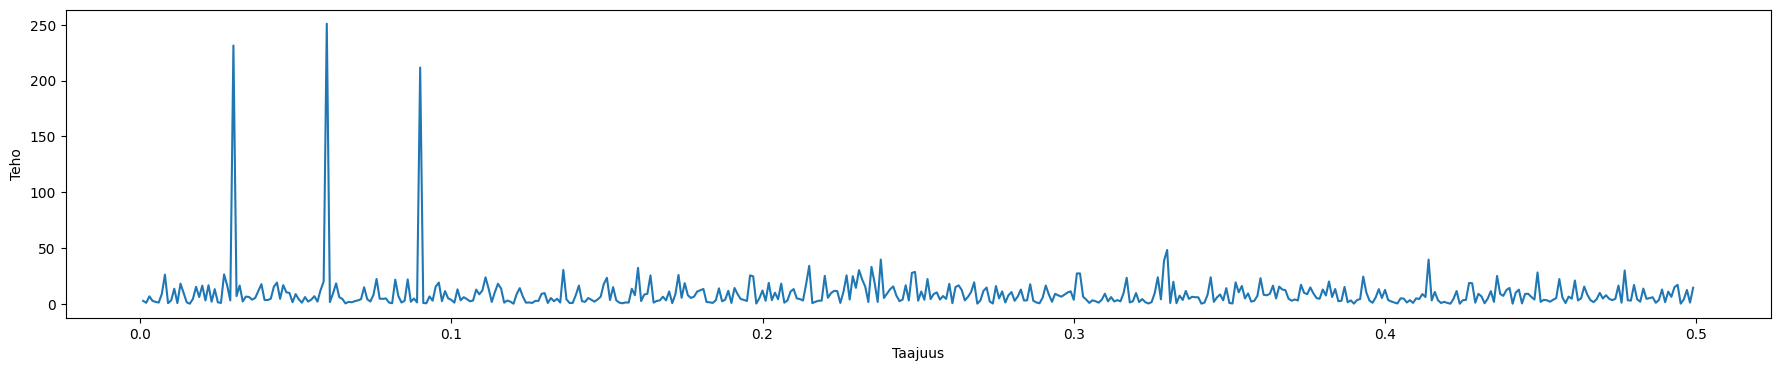

Kolme tehokkainta taajuutta ovat [0.03 0.06 0.09]


In [23]:
#Määrirellään, että signaali on sämplätty sekunnin välein
dt = 1
#Lasketaan signaalin Fourier-muunnos ja tehospektri
N = len(signal) #Pisteiden määrä
fourier = np.fft.fft(signal,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Mahdolliset taajuudet
L = np.arange(1,int(N/2)) #Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.figure(figsize=(22,4))
#plt.semilogx(freq[L],psd[L].real)
plt.plot(freq[L],psd[L].real)
plt.xlabel('Taajuus')
plt.ylabel('Teho')
plt.show()

#Kolme tehokkainta taajuutta:
print('Kolme tehokkainta taajuutta ovat',freq[psd > 100][0:3])

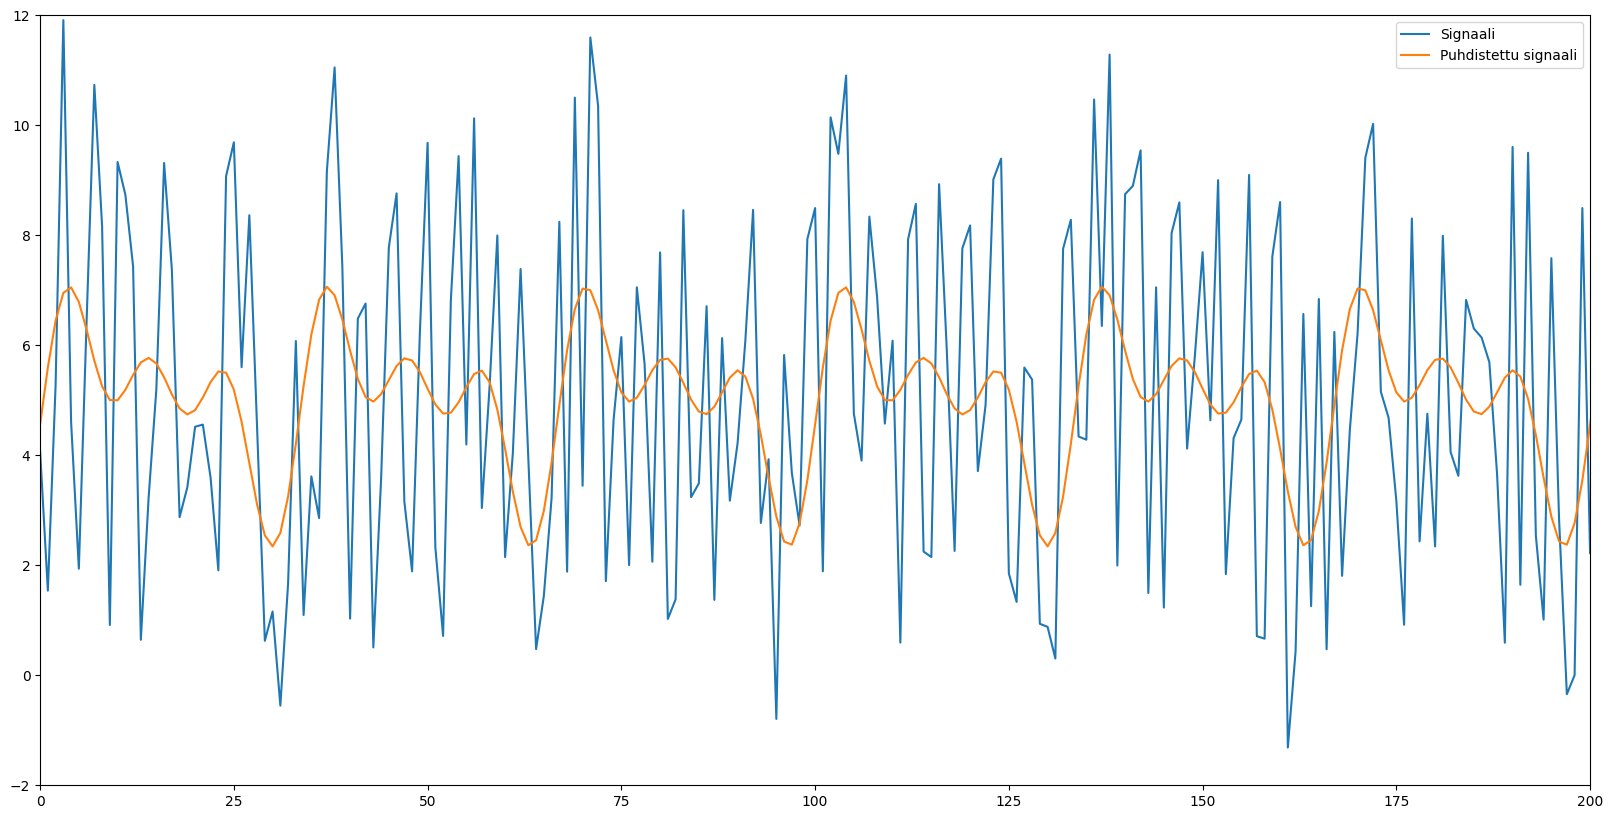

In [27]:
#Poistetaan kohina, eli rajataan pois taajuudet piikkien ulkopuolella. 
#Tässä voidaan esimerkiksi päättää, että tehon tulee olla yli 100 
fourier_clean = fourier.copy() #Kopio alkuperäisen signaalin fft:stä. Huom! Fourier-muunnos sisältää täydellisen informaation signaalista. Eli siitä voidaan palauttaa alkuperäinen signaali
fourier_clean[psd.real < 100] = 0 #Asetaan nollaan kaikki taajuuden piikkien ulkopuolella
signal_cleaned = np.fft.ifft(fourier_clean)

#Piirretään kuvaaja 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(signal+signal_mean)
plt.plot(signal_cleaned.real+signal_mean)
plt.axis([0,200,-2,12])
plt.legend(['Signaali','Puhdistettu signaali'])
plt.show()

In [31]:
#15. Kirjoita Fuorier-analyysiä käyttäen Pythonilla yli- ja alipäästösuodatin.  Testaa suodattimia esimerkiksi kävelyn aikana tehtyjen kiihtyvyyshavaintojen suodattamisen. 

#Kirjoiteteaan alipäästösuodatin, joka päästää läpi ainoastaan cut-off -taajuutta pienemmät taajuudet

def alipaasto(signal,dt,cutoff):
    #Lasketaan signaalin Fourier-muunnos ja tehospektri
    N = len(signal) #Pisteiden määrä
    fourier = np.fft.fft(signal,N) #Fourier-muunnos
    freq = np.fft.fftfreq(N,dt) #Mahdolliset taajuudet
    fourier_clean = fourier.copy() #Kopio alkuperäisen signaalin fft:stä. Huom! Fourier-muunnos sisältää täydellisen informaation signaalista. Eli siitä voidaan palauttaa alkuperäinen signaali
    fourier_clean[np.abs(freq) > cutoff] = 0 #Asetaan nollaan kaikki cutt-of taajuutta suuremmat taajuudet
    signal_cleaned = np.fft.ifft(fourier_clean)
    return signal_cleaned.real

#Kirjoiteteaan ylipäästösuodatin, joka päästää läpi ainoastaan cut-off -taajuutta suuremmat taajuudet

def ylipaasto(signal,dt,cutoff):
    #Lasketaan signaalin Fourier-muunnos ja tehospektri
    N = len(signal) #Pisteiden määrä
    fourier = np.fft.fft(signal,N) #Fourier-muunnos
    freq = np.fft.fftfreq(N,dt) #Mahdolliset taajuudet
    fourier_clean = fourier.copy() #Kopio alkuperäisen signaalin fft:stä. Huom! Fourier-muunnos sisältää täydellisen informaation signaalista. Eli siitä voidaan palauttaa alkuperäinen signaali
    fourier_clean[np.abs(freq) < cutoff] = 0 #Asetaan nollaan kaikki cutt-of taajuutta pienemmät taajuudet
    signal_cleaned = np.fft.ifft(fourier_clean)
    return signal_cleaned.real

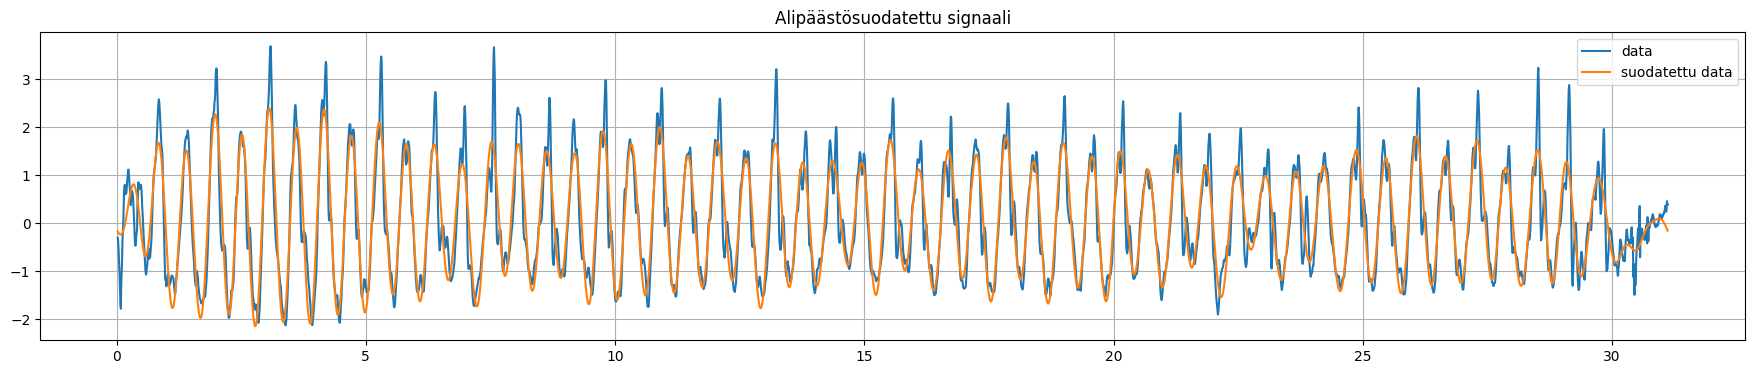

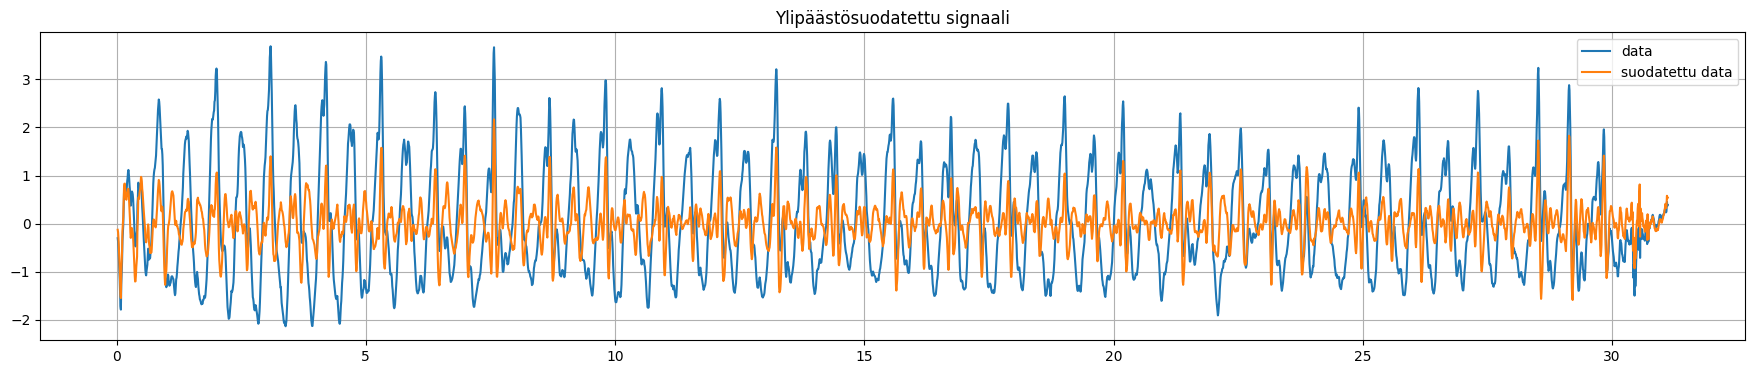

In [34]:
#Testataan suodattimia
df = pd.read_csv('./Data/askeldata.csv')
data = df['Linear Acceleration y (m/s^2)']
T_tot = df['Time (s)'].max() #Koko datan pituus
n = len(df['Time (s)']) #Datapisteiden lukumäärä
dt =T_tot/n #Näytteenottotaajus, OLETETAAN VAKIOKSI
cutoff = 1/0.4 #Cut-off taajuus, tätä suuremmat taajuuden alipäästösuodatin poista datasta

data_filt = alipaasto(data,dt,cutoff)
#Piirretään kuvaa, jossa alkuperäinen ja suodatettu signaali
plt.figure(figsize=(22,4))
plt.plot(df['Time (s)'],data,label = 'data')
plt.plot(df['Time (s)'],data_filt,label = 'suodatettu data')
plt.title('Alipäästösuodatettu signaali')
plt.grid()
plt.legend()
plt.show()

data_filt = ylipaasto(data,dt,cutoff)
#Piirretään kuvaa, jossa alkuperäinen ja suodatettu signaali
plt.figure(figsize=(22,4))
plt.plot(df['Time (s)'],data,label = 'data')
plt.plot(df['Time (s)'],data_filt,label = 'suodatettu data')
plt.title('Ylipäästösuodatettu signaali')
plt.grid()
plt.legend()
plt.show()